Корректировка финальной таблицы с данными

In [7]:
import os
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats.stats import pearsonr
from collections import Counter

In [2]:
gp_table = pd.read_table('./crab_gp_kaz_10_2010-2019_calib_dina_2020-03-11.csv')

fl = np.genfromtxt('./patterns/total_profile.txt')

In [3]:
gp_table['zeros_ends'] = None
gp_table['pears'] = None

In [4]:
for idx, value in enumerate(gp_table['fName']):
    
    profile = np.genfromtxt(value, skip_header=6)

    try:
        p0 = pearsonr(profile, fl)[0]
    except ValueError:
        gp_table['pears'][idx] = 0.1
    gp_table['pears'][idx] = p0
    
    start = profile[:10]
    end = profile[-10:]
    if  min(start) == max(start) == 0. or min(end) == max(end) == 0.:
        gp_table['zeros_ends'][idx] = 1
    else:
        gp_table['zeros_ends'][idx] = 0

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

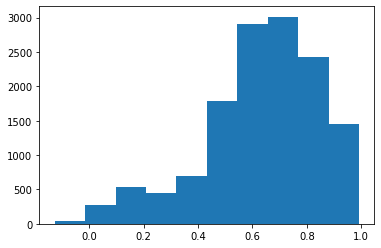

In [5]:
plt.close()
plt.hist(gp_table['pears'])
plt.show()

In [8]:
NOW = datetime.datetime.now().strftime("%Y-%m-%d")
gp_table.to_csv(f'crab_gp_kaz_10_2010-2019_calib_dina_{NOW}_corrected.csv', sep='\t', header=True, index=False)